In [88]:
info = """
LangChain 1.0 - Context Management (上下文管理)
==============================================

本模块重点讲解：
1. SummarizationMiddleware - 自动摘要中间件（LangChain 1.0 新增）
2. trim_messages - 消息修剪工具
3. 管理对话长度，避免超 token
4. 中间件的使用
"""
print(info)


LangChain 1.0 - Context Management (上下文管理)

本模块重点讲解：
1. SummarizationMiddleware - 自动摘要中间件（LangChain 1.0 新增）
2. trim_messages - 消息修剪工具
3. 管理对话长度，避免超 token
4. 中间件的使用



In [89]:

import os
from dotenv import load_dotenv
from langchain.chat_models import init_chat_model
from langchain.agents import create_agent
from langchain_core.tools import tool
from langgraph.checkpoint.memory import InMemorySaver
from langchain.agents.middleware import SummarizationMiddleware

In [156]:
# 加载环境变量
load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

if not GROQ_API_KEY or GROQ_API_KEY == "your_groq_api_key_here":
    raise ValueError(
        "\n请先在 .env 文件中设置有效的 GROQ_API_KEY\n"
        "访问 https://console.groq.com/keys 获取免费密钥"
    )

# 初始化模型
model = init_chat_model("groq:moonshotai/kimi-k2-instruct-0905" ,api_key=GROQ_API_KEY)


In [91]:
model.invoke("nihao ")

AIMessage(content='你好！有什么我可以帮助你的吗？', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 45, 'prompt_tokens': 236, 'total_tokens': 281, 'completion_time': 0.09388, 'completion_tokens_details': None, 'prompt_time': 0.007887, 'prompt_tokens_details': None, 'queue_time': 0.122324, 'total_time': 0.101768}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3b95-b37b-75d3-acea-55902df568ea-0', usage_metadata={'input_tokens': 236, 'output_tokens': 45, 'total_tokens': 281})

In [92]:
@tool
def calculator(operation: str, a: float, b: float) -> str:
    """执行数学计算"""
    ops = {
        "add": lambda x, y: x + y,
        "multiply": lambda x, y: x * y,
    }
    result = ops.get(operation, lambda x, y: 0)(a, b)
    return f"{a} {operation} {b} = {result}"


In [93]:
print("""
    示例1：问题演示 - 对话历史会无限增长

    问题：
    - 消息越来越多
    - 超过模型 token 限制
    - 成本增加、响应变慢
    """)


    示例1：问题演示 - 对话历史会无限增长

    问题：
    - 消息越来越多
    - 超过模型 token 限制
    - 成本增加、响应变慢
    


In [94]:
print("\n" + "="*70)
print("示例 1：问题演示 - 对话历史无限增长")
print("="*70)


示例 1：问题演示 - 对话历史无限增长


In [95]:
config = {"configurable": {"thread_id": "user_session_1"}}

In [96]:
agent = create_agent(
    model=model,
    tools=[],
    system_prompt="你是一个有帮助的助手。",
        checkpointer=InMemorySaver()
)

In [97]:
print("\n模拟 10 轮对话...")
for i in range(1, 11):
    agent.invoke(
        {"messages": [{"role": "user", "content": f"这是第 {i} 轮对话"}]},
        config=config
    )


模拟 10 轮对话...


In [98]:
response = agent.invoke(
    {"messages": [{"role": "user", "content": "总结一下"}]},
    config=config
)

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `meta-llama/llama-4-scout-17b-16e-instruct` in organization `org_01kcn617d6fcfvyetq8khkg72p` service tier `on_demand` on tokens per minute (TPM): Limit 30000, Used 28164, Requested 2774. Please try again in 1.876s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'compound', 'code': 'rate_limit_exceeded'}}

In [ ]:
response

{'messages': [HumanMessage(content='这是第 1 轮对话', additional_kwargs={}, response_metadata={}, id='b2993f26-b700-4c51-868e-b6d62ffab545'),
  AIMessage(content='<think>\n好的，用户说这是第1轮对话。看起来他们可能是在测试对话流程或者想要记录对话的轮次。我需要确认他们是否需要我以特定的方式回应，比如编号每轮对话或者跟踪进度。我应该保持友好，并询问他们是否需要帮助，或者是否有具体的问题需要解决。同时，要注意他们可能希望对话有结构化的进展，所以保持清晰和有条理的回应会更好。另外，用户可能是在练习某种对话流程，或者在进行某种测试，所以我的回应需要灵活适应他们的需求。最后，确保回复简洁，避免信息过载，同时提供足够的支持选项。\n</think>\n\n你好！欢迎开始我们的对话。有什么我可以帮助你的吗？无论是问题解答、信息查询，还是其他需求，我都会尽力为你提供帮助。', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 166, 'prompt_tokens': 28, 'total_tokens': 194, 'completion_time': 0.415942721, 'completion_tokens_details': None, 'prompt_time': 0.001018513, 'prompt_tokens_details': None, 'queue_time': 0.057717497, 'total_time': 0.416961234}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3b93-c6d2-7200-8f64-c20e6070cb97-0', usage

In [ ]:
len(response["messages"])

22

In [ ]:
print("\n问题：")
print("  - 消息越来越多，内存占用增加")
print("  - 超过模型 token 限制会报错")
print("  - 每次调用都要传输全部历史，成本增加")


问题：
  - 消息越来越多，内存占用增加
  - 超过模型 token 限制会报错
  - 每次调用都要传输全部历史，成本增加


In [ ]:
print( """
    示例2：使用 SummarizationMiddleware 自动摘要

    关键：LangChain 1.0 新增的中间件
    当消息数超过阈值时，自动摘要旧消息
    """)


    示例2：使用 SummarizationMiddleware 自动摘要

    关键：LangChain 1.0 新增的中间件
    当消息数超过阈值时，自动摘要旧消息
    


In [ ]:
print("\n" + "="*70)
print("示例 2：SummarizationMiddleware - 自动摘要")
print("="*70)


示例 2：SummarizationMiddleware - 自动摘要


/var/folders/2t/w_0f5ts90870qhccyfzjmdgh0000gn/T/ipykernel_45770/2252195943.py:7: DeprecationWarning: max_tokens_before_summary is deprecated. Use trigger=('tokens', value) instead.
  SummarizationMiddleware(


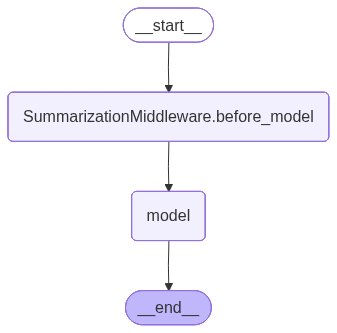

In [115]:
agent = create_agent(
    model=model,
    tools=[],
    system_prompt="你是一个有帮助的助手。",
    checkpointer=InMemorySaver(),
    middleware=[
        SummarizationMiddleware(
            model="groq:groq/compound",
            max_tokens_before_summary=50,)]
    )
agent

In [116]:
config = {"configurable": {"thread_id": "with_summary"}}


In [117]:
print("\n进行多轮对话...")
conversations = [
    "我叫张三，是工程师",
    "我在北京工作",
    # "我喜欢编程和阅读",
    # "我最近在学习 AI",
    # "请总结一下我的信息"
]


进行多轮对话...


In [118]:
final_response = {}
for msg in conversations:
    print(f"\n用户: {msg}")

    response = agent.invoke(
        {"messages": [{"role": "user", "content": msg}]},
        config=config
    )
    final_response = response
print(f"Agent: {final_response['messages']}")
print("*"*50)


用户: 我叫张三，是工程师

用户: 我在北京工作
Agent: [HumanMessage(content='我叫张三，是工程师', additional_kwargs={}, response_metadata={}, id='7c3bd46a-186d-44d9-8a74-b8a1eb070979'), AIMessage(content='你好，张三！很高兴认识你，工程师的工作一定很有挑战性。有什么我可以帮你的吗？', additional_kwargs={'reasoning_content': '<Think>\n\n</Think>'}, response_metadata={'token_usage': {'completion_tokens': 77, 'prompt_tokens': 265, 'total_tokens': 342, 'completion_time': 0.163781, 'completion_tokens_details': None, 'prompt_time': 0.008546, 'prompt_tokens_details': None, 'queue_time': 0.10373, 'total_time': 0.172327}, 'model_name': 'groq/compound', 'system_fingerprint': None, 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3b9d-0023-7ab3-a5cd-7ec58e309e7d-0', usage_metadata={'input_tokens': 265, 'output_tokens': 77, 'total_tokens': 342}), HumanMessage(content='我在北京工作', additional_kwargs={}, response_metadata={}, id='4d425219-ade8-4b8d-b30c-df3fa532bd62'), AIMessage(content='原来如此！北京的工作和生活节奏都很快

In [ ]:
print( """
    示例3：SummarizationMiddleware 参数详解
    """)


    示例3：SummarizationMiddleware 参数详解
    


In [ ]:
print("\n" + "="*70)
print("示例 3：Summarization 参数详解")
print("="*70)

print("""
SummarizationMiddleware 参数：

1. model (必需)
- 用于生成摘要的模型
- 可以用便宜的模型（如 gpt-3.5）降低成本

2. max_tokens_before_summary
- 触发摘要的 token 数阈值
- 默认: 1000
- 建议：根据模型上下文窗口设置（如 4k 模型设为 3000）

3. summarization_prompt (可选)
- 自定义摘要提示词
- 默认：简洁摘要对话历史

示例：
```python
agent = create_agent(
model=model,
tools=[],
middleware=[
    SummarizationMiddleware(
        model="groq:llama-3.3-70b-versatile",  # 摘要模型
        max_tokens_before_summary=500,         # 500 tokens 触发
    )
],
checkpointer=InMemorySaver()
)
```
""")


示例 3：Summarization 参数详解

SummarizationMiddleware 参数：

1. model (必需)
- 用于生成摘要的模型
- 可以用便宜的模型（如 gpt-3.5）降低成本

2. max_tokens_before_summary
- 触发摘要的 token 数阈值
- 默认: 1000
- 建议：根据模型上下文窗口设置（如 4k 模型设为 3000）

3. summarization_prompt (可选)
- 自定义摘要提示词
- 默认：简洁摘要对话历史

示例：
```python
agent = create_agent(
model=model,
tools=[],
middleware=[
    SummarizationMiddleware(
        model="groq:llama-3.3-70b-versatile",  # 摘要模型
        max_tokens_before_summary=500,         # 500 tokens 触发
    )
],
checkpointer=InMemorySaver()
)
```



In [119]:
print("""
    示例4：使用 trim_messages 手动修剪消息

    适用场景：需要精确控制保留的消息数量
    """)


    示例4：使用 trim_messages 手动修剪消息

    适用场景：需要精确控制保留的消息数量
    


In [120]:
print("\n" + "="*70)
print("示例 4：手动消息修剪")
print("="*70)


示例 4：手动消息修剪


In [121]:
from langchain_core.messages import trim_messages
from langchain_core.messages import HumanMessage, AIMessage


In [122]:
messages = [
    HumanMessage(content="消息 1"),
    AIMessage(content="回复 1"),
    HumanMessage(content="消息 2"),
    AIMessage(content="回复 2"),
    HumanMessage(content="消息 3"),
    AIMessage(content="回复 3"),
    HumanMessage(content="消息 4"),
    AIMessage(content="回复 4"),
]

In [136]:
trimmed = trim_messages(
    messages,
    # max_count=5,  # 严格保留最后 5 条消息
    max_tokens=4,  # 或使用 token 数限制
    strategy="last",  # 保留最后的消息
    token_counter=len  # 简单计数器（实际应该用 token 计数）这里其实不会被用到，因为 max_count 优先
)

In [137]:
len(trimmed)

4

In [138]:
for msg in trimmed:
    print(f"  {msg.__class__.__name__}: {msg.content}")

  HumanMessage: 消息 3
  AIMessage: 回复 3
  HumanMessage: 消息 4
  AIMessage: 回复 4


In [139]:
print("\n关键点：")
print("  - trim_messages 手动控制消息数量")
print("  - 适合需要精确控制的场景")
print("  - 需要自己管理修剪逻辑")


关键点：
  - trim_messages 手动控制消息数量
  - 适合需要精确控制的场景
  - 需要自己管理修剪逻辑


In [140]:
"""
示例5：对比不同的上下文管理策略
"""
print("\n" + "="*70)
print("示例 5：策略对比")
print("="*70)


示例 5：策略对比


In [141]:
print("""
策略对比：

1. 不做处理（默认）
   优点：保留完整历史
   缺点：会超 token、成本高
   适用：短对话

2. SummarizationMiddleware（推荐）
   优点：
   - 自动化，无需手动管理
   - 保留重要信息（通过摘要）
   - 平滑过渡
   缺点：
   - 摘要可能丢失细节
   - 额外的摘要成本
   适用：长对话、需要保留上下文

3. trim_messages（手动修剪）
   优点：
   - 精确控制
   - 简单直接
   - 无额外成本
   缺点：
   - 旧消息完全丢失
   - 可能断开上下文
   适用：只需要最近 N 轮

4. 滑动窗口（自定义）
   优点：
   - 保留系统消息 + 最近消息
   - 可控成本
   缺点：
   - 需要自己实现
   适用：有明确规则的场景

推荐方案：
- 短对话（<10轮）：不处理
- 中长对话：SummarizationMiddleware
- 只要最近几轮：trim_messages
    """)


策略对比：

1. 不做处理（默认）
   优点：保留完整历史
   缺点：会超 token、成本高
   适用：短对话

2. SummarizationMiddleware（推荐）
   优点：
   - 自动化，无需手动管理
   - 保留重要信息（通过摘要）
   - 平滑过渡
   缺点：
   - 摘要可能丢失细节
   - 额外的摘要成本
   适用：长对话、需要保留上下文

3. trim_messages（手动修剪）
   优点：
   - 精确控制
   - 简单直接
   - 无额外成本
   缺点：
   - 旧消息完全丢失
   - 可能断开上下文
   适用：只需要最近 N 轮

4. 滑动窗口（自定义）
   优点：
   - 保留系统消息 + 最近消息
   - 可控成本
   缺点：
   - 需要自己实现
   适用：有明确规则的场景

推荐方案：
- 短对话（<10轮）：不处理
- 中长对话：SummarizationMiddleware
- 只要最近几轮：trim_messages
    


In [142]:
"""
    示例6：实际应用 - 客服机器人

    场景：客服对话可能很长，需要管理上下文
    """

'\n    示例6：实际应用 - 客服机器人\n\n    场景：客服对话可能很长，需要管理上下文\n    '

In [169]:
print("\n" + "="*70)
print("示例 6：实际应用 - 客服机器人")
print("="*70)



示例 6：实际应用 - 客服机器人


In [ ]:
agent = create_agent(
    model=model,
    tools=[calculator],
    system_prompt="""你是客服助手。
特点：
- 记住用户问题
- 简洁回答
- 使用工具计算""",
    checkpointer=InMemorySaver(),
    middleware=[
        SummarizationMiddleware(
            model="groq:moonshotai/kimi-k2-instruct-0905",
            max_tokens_before_summary=100,
        )
    ]
)

/var/folders/2t/w_0f5ts90870qhccyfzjmdgh0000gn/T/ipykernel_45770/1213466183.py:11: DeprecationWarning: max_tokens_before_summary is deprecated. Use trigger=('tokens', value) instead.
  SummarizationMiddleware(


In [176]:
config = {"configurable": {"thread_id": "customer_121"}}

# 模拟客服对话
conversations = [
    "你好，我想咨询订单",
    "我的订单号是 12345",
    "帮我算一下 100 乘以 2 的优惠价",
    "谢谢",
    "你是谁？",
    "我是客服助手",
    "请告诉我你的问题",
    "以上是对话摘要，请继续帮助用户。"
]


In [178]:
for msg in conversations:
        print(f"\n客户: {msg}")
        response = agent.invoke(
            {"messages": [{"role": "user", "content": msg}]},
            config=config
        )
        print(f"客服: {response['messages']}")
        print("*"*50)


客户: 你好，我想咨询订单
客服: [HumanMessage(content='你好，我想咨询订单', additional_kwargs={}, response_metadata={}, id='e63e9697-1268-4e57-a996-72aacc82dfa1'), AIMessage(content='你好！请问您的订单号是多少？或者您可以告诉我具体想咨询订单的哪方面问题，我来帮您处理。', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 122, 'total_tokens': 147, 'completion_time': 0.115765938, 'completion_tokens_details': None, 'prompt_time': 0.048026373, 'prompt_tokens_details': None, 'queue_time': 0.317442025, 'total_time': 0.163792311}, 'model_name': 'moonshotai/kimi-k2-instruct-0905', 'system_fingerprint': 'fp_05df423bab', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b3bb3-9c5c-7490-9811-624cd154bc29-0', usage_metadata={'input_tokens': 122, 'output_tokens': 25, 'total_tokens': 147}), HumanMessage(content='我的订单号是 12345', additional_kwargs={}, response_metadata={}, id='0fa8b70d-91c6-45b9-838b-1112b2035508'), AIMessage(content='收到，订单号 12345。请问您想咨询关于

In [ ]:
print("\n关键点：")
print("  - 自动管理对话长度")
print("  - 重要信息（订单号）通过摘要保留")
print("  - 适合生产环境")